### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [130]:
data = pd.read_csv('data/coupons.csv')

In [131]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

<Axes: >

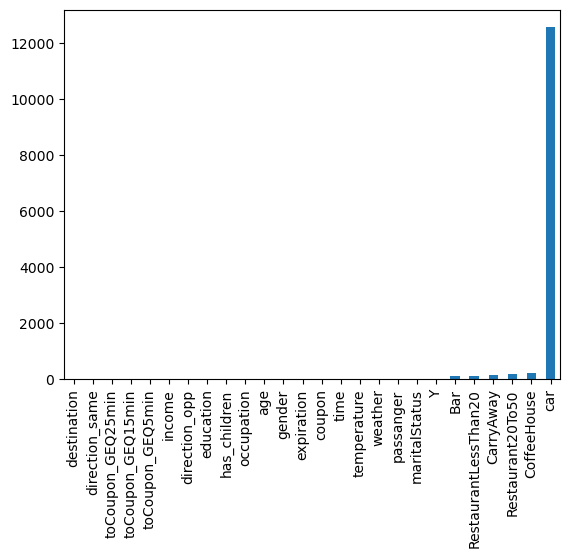

In [133]:
data.isnull().sum().sort_values().plot(kind = 'bar')

In [134]:
### drop car column
data = data.drop(columns=['car'])

In [135]:
### check the data
data.head(-5)
#data.shape

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1


In [136]:
### replace NaN with noValue
data['Bar'].fillna('noValue', inplace=True)
data['RestaurantLessThan20'].fillna('noValue', inplace=True)
data['CarryAway'].fillna('noValue', inplace=True)
data['Restaurant20To50'].fillna('noValue', inplace=True)
data['CoffeeHouse'].fillna('noValue', inplace=True)
### check the data
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,noValue,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [137]:
### Find total coupons accepted and divide by total observations to get proportion accepted the coupon
PropCouponAccepted = (len(data[data['Y'] == 1])/len(data)) 

print("Proportion of the total observations chose to accept the coupon: {:.2%}".format(PropCouponAccepted)) 

Proportion of the total observations chose to accept the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

,Y
coupon,
Bar,827
Carry out & Take away,1760
Coffee House,1995
Restaurant(20-50),658
Restaurant(<20),1970


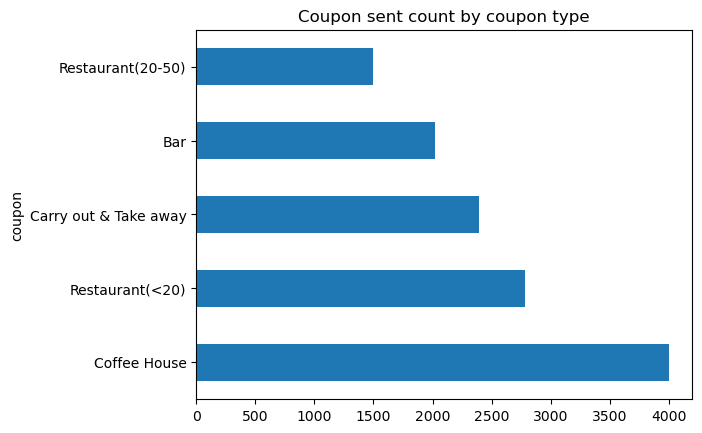

In [138]:
data['coupon'].value_counts().plot.barh() 
plt.title("Coupon sent count by coupon type")
plotdata = data.groupby('coupon')[['Y']].sum()
plotdata.head()
# Tried different plots----
#sns.barplot(data=data, y='coupon', x='Y')
#data['coupon'].value_counts().plot.barh()                                              
#plotdata = data.groupby('coupon')[['Y']].sum()
#plotdata.head()
#fig = px.bar(plotdata, x='coupon', hue='Y')
#fig.show()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

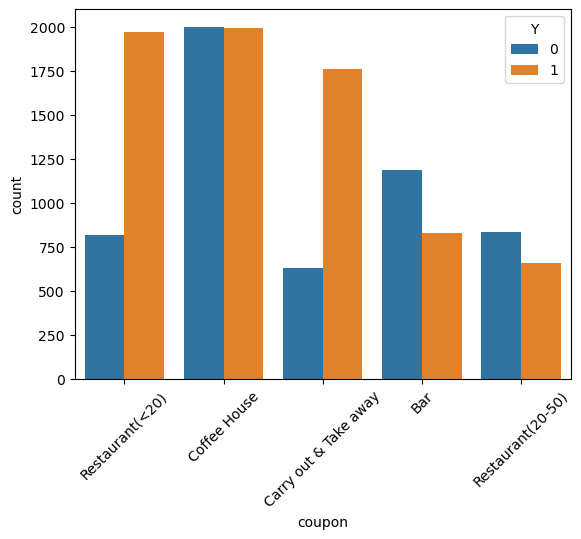

In [139]:
sns.countplot(x='coupon', hue='Y', data=data)
plt.xticks(rotation=45)

<Axes: title={'center': 'Type of Coupon with stacked response'}, xlabel='coupon'>

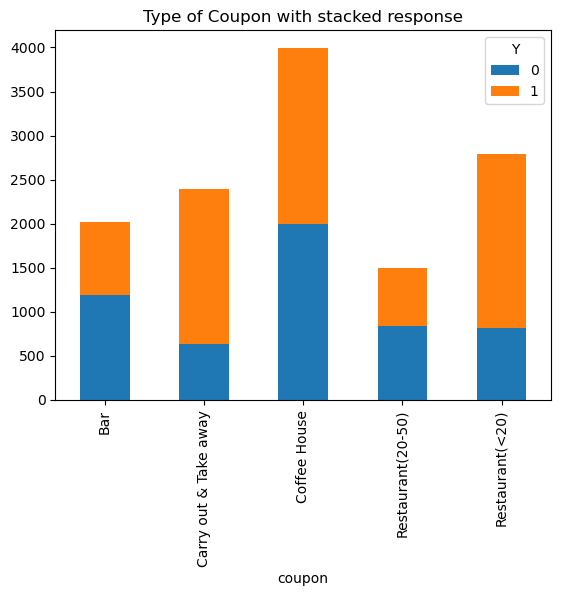

In [140]:
pd.crosstab(data['coupon'], data['Y']).plot(kind='bar', stacked=True, title="Type of Coupon with stacked response")

6. Use a histogram to visualize the temperature column.

(array([2316.,    0., 3840.,    0., 6528.]),
 array([30., 40., 50., 60., 70., 80.]),
 <BarContainer object of 5 artists>)

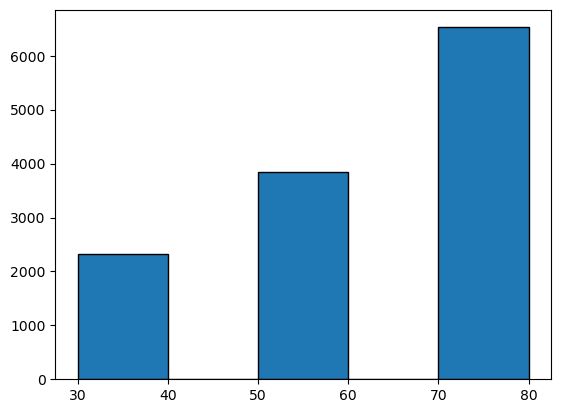

In [141]:
#data.hist worked as well, but wanted to scale it down to temp ranges
## so ended up using plt.hist
plt.hist(data['temperature'], bins=5, edgecolor='black')


array([[<Axes: title={'center': 'Bar'}>,
        <Axes: title={'center': 'Carry out & Take away'}>],
       [<Axes: title={'center': 'Coffee House'}>,
        <Axes: title={'center': 'Restaurant(20-50)'}>],
       [<Axes: title={'center': 'Restaurant(<20)'}>, <Axes: >]],
      dtype=object)

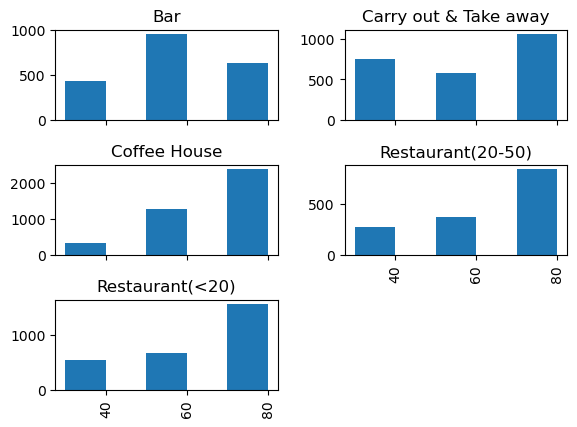

In [142]:
data.hist(column='temperature', by=['coupon'],sharex=True,bins=5) 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [143]:
bardf = data.loc[data['coupon'] == 'Bar'].copy()
bardf.shape

(2017, 25)

2. What proportion of bar coupons were accepted?


In [144]:
### Find total bar coupons accepted and divide by total observations to get proportion
PropBarCouponAccepted = (len(bardf[bardf['Y'] == 1])/len(bardf)) 

print("Proportion of Bar coupon accepted : {:.2%}".format(PropBarCouponAccepted)) 

Proportion of Bar coupon accepted : 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [145]:
#plt.hist(bardf['Bar'], bins=20, edgecolor='black') 
optionsFew = ['never','less1','1~3']
df1to3orless = bardf[bardf['Bar'].isin(optionsFew)]
#print(df1to3orless['Y'].mean())
AccpBar1to3OrLess = (len(df1to3orless[df1to3orless['Y'] == 1])/len(df1to3orless)) 

optionsMore = ['4~8','gt8']
df3ormore = bardf[bardf['Bar'].isin(optionsMore)]
#print(df3ormore['Y'].mean())

AccpBar3OrMore = (len(df3ormore[df3ormore['Y'] == 1])/len(df3ormore)) 

print("Proportion of those who went to a bar 3 or fewer times a month : {:.2%}".format(AccpBar1to3OrLess)) 
print("Proportion of those who went to a bar more than 3 times a month : {:.2%}".format(AccpBar3OrMore)) 



Proportion of those who went to a bar 3 or fewer times a month : 37.06%
Proportion of those who went to a bar more than 3 times a month : 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [146]:
#plt.hist(bardf['age'], bins=20, edgecolor='black') 

moreThanOnce = ['1~3','4~8','gt8']  
AgeOver25 = ['26', '31', '36','41','46','50plus']

dfMorethanOnceOver25 = bardf[bardf['Bar'].isin(moreThanOnce) & bardf['age'].isin(AgeOver25)]
#print(dfMorethanOnceOver25['Y'].mean())

lessThanOnce = ['less1','never']
#AgeOver25 = ['26', '31', '36','41','46','50plus']
dfAllOthers = bardf[bardf['Bar'].isin(lessThanOnce)]


print("Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 : {:.2%}".format(dfMorethanOnceOver25['Y'].mean())) 
print("acceptance rate all others: {:.2%}".format(dfAllOthers['Y'].mean())) 


Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 : 69.52%
acceptance rate all others: 29.21%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [147]:
#plt.hist(bardf['passanger'], bins=20, edgecolor='black') 
#plt.hist(bardf['occupation'], bins=20, edgecolor='black') 
#plt.xticks(rotation=45)
moreThanOnce = ['1~3','4~8','gt8']
passangerKid = ['Kid(s)','Alone']
occupationFarming = ['farming, fishing, or forestry']

dfCond = bardf[bardf['Bar'].isin(moreThanOnce)]
dfCond = dfCond[~dfCond['passanger'].isin(passangerKid)]
dfCond = dfCond[~dfCond['occupation'].isin(occupationFarming)]
display(dfCond[['Bar','passanger','occupation']])

#display(dfCond[['Bar','passanger','occupation']])

#plt.hist(dfCond['occupation'], bins=20, edgecolor='black')
#plt.xticks(rotation=45)

print("drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.: {:.2%}".format(dfCond['Y'].mean())) 


,Bar,passanger,occupation
90,1~3,Friend(s),Student
112,1~3,Friend(s),Student
156,gt8,Friend(s),Healthcare Support
224,1~3,Partner,Management
227,1~3,Partner,Management
...,...,...,...
12481,1~3,Friend(s),Office & Administrative Support
12482,1~3,Friend(s),Office & Administrative Support
12488,1~3,Partner,Office & Administrative Support
12525,1~3,Friend(s),Food Preparation & Serving Related


drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.: 71.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 




In [148]:
#- go to bars more than once a month, had passengers that were not a kid, and were not widowed
moreThanOnce = ['1~3','4~8','gt8']
passangerKid = ['Kid(s)','Alone']
marStatus = ['Widowed']
underage30NOT =  ['31', '36','41','46','50plus']
#occupationFarming = ['farming, fishing, or forestry']
df1ormorenokidnotwidowed = bardf[bardf['Bar'].isin(moreThanOnce)]
df1ormorenokidnotwidowed =  df1ormorenokidnotwidowed[~df1ormorenokidnotwidowed['passanger'].isin(passangerKid)]
df1ormorenokidnotwidowed =  df1ormorenokidnotwidowed[~df1ormorenokidnotwidowed['maritalStatus'].isin(marStatus)]

#display(df1ormorenokidnotwidowed[['Bar','passanger','maritalStatus']])
#plt.hist(bardf['maritalStatus'], bins=20, edgecolor='black') 
print("Drivers who go to bars more than once a month and had passengers that were not a kid and were no widowed.: {:.2%}".format(df1ormorenokidnotwidowed['Y'].mean())) 
#----------------------

#go to bars more than once a month and are under the age of 30
df1ormoreunder30 = bardf[bardf['Bar'].isin(moreThanOnce)]
df1ormoreunder30 =  df1ormoreunder30[~df1ormoreunder30['age'].isin(underage30NOT)]
print("More than once a month and are under the age of 30 .: {:.2%}".format(df1ormoreunder30['Y'].mean())) 


#----------------------
#go to cheap restaurants more than 4 times a month and income is less than 50K
More4timesCheap = ['4~8', 'gt8']
Incomeless50K = ['$37500 - $49999','$12500 - $24999', '$25000 - $37499','Less than $12500'] 
over4Timeslessthan50k = bardf[bardf['RestaurantLessThan20'].isin(More4timesCheap) & bardf['income'].isin(Incomeless50K)]
print("Go to cheap restaurants more than 4 times a month and income is less than 50K: {:.2%}".format(over4Timeslessthan50k['Y'].mean())) 



Drivers who go to bars more than once a month and had passengers that were not a kid and were no widowed.: 71.79%
More than once a month and are under the age of 30 .: 72.17%
Go to cheap restaurants more than 4 times a month and income is less than 50K: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [149]:
### Based on the analysis, we can hypothesize that 
### 1. Drivers more likley to accept coupons are those who go to bars more than once and are under 30 years of age.
### 2. We also observered that drivers who are not widowed and are not driving with kids are likely to accept bar coupon.
### 3. The other high rate of acceptance are drivers whose occupation is not farmening and are who did not have a kid as a passanger are likley to accept the bar coupon 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [150]:
### I would like to explore "Carry out and Take away coupons"

In [151]:
# Crerate a subset dataframe for carry out coupon
carryOutdf = data.loc[data['coupon'] == 'Carry out & Take away'].copy()
carryOutdf.shape

(2393, 25)

<Axes: title={'center': 'Carry Away accepted stacked response'}, xlabel='CarryAway'>

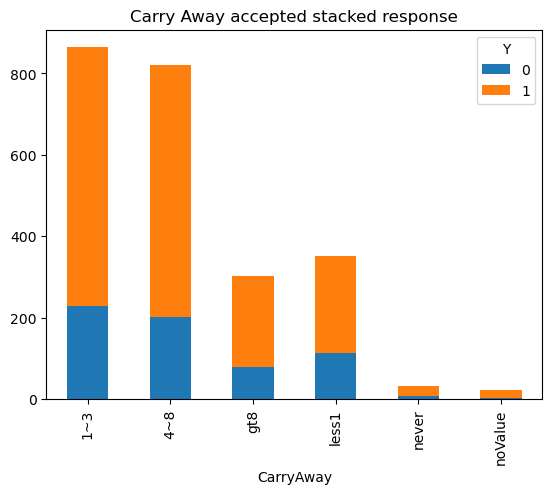

In [152]:
#plt.hist(carryOutdf['CarryAway'], color= 'passanger',bins=20, edgecolor='black') 
pd.crosstab(carryOutdf['CarryAway'], data['Y']).plot(kind='bar', stacked=True, title="Carry Away accepted stacked response")

In [153]:
moreThanOnce = ['1~3','4~8','gt8']
passangerKid = ['Kid(s)','Alone']
marStatus = ['Widowed']
underage30 =  ['31', '36','41','46','50plus']
underage40 =  ['41','46','50plus']

#occupationFarming = ['farming, fishing, or forestry']
dfCarrywithKidAlone = carryOutdf[carryOutdf['CarryAway'].isin(moreThanOnce) & carryOutdf['passanger'].isin(passangerKid) & carryOutdf['age'].isin(underage40)]
 

display(dfCarrywithKidAlone[['CarryAway','passanger','passanger', 'Y']])


print("More than once a month and are alone or kid: {:.2%}".format(dfCarrywithKidAlone['Y'].mean())) 


,CarryAway,passanger,passanger,Y
63,1~3,Alone,Alone,1
74,1~3,Kid(s),Kid(s),1
85,1~3,Alone,Alone,0
309,1~3,Kid(s),Kid(s),0
320,1~3,Alone,Alone,0
...,...,...,...,...
12596,1~3,Alone,Alone,1
12599,1~3,Alone,Alone,1
12600,1~3,Alone,Alone,1
12603,1~3,Alone,Alone,1


More than once a month and are alone or kid: 77.16%


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'noValue'),
  Text(1, 0, '4~8'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, 'less1'),
  Text(5, 0, 'never')])

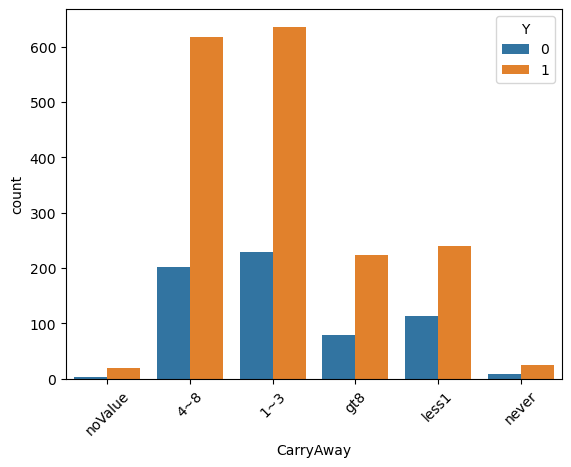

In [154]:
sns.countplot(x='CarryAway', hue='Y', data=carryOutdf)
plt.xticks(rotation=45)


In [155]:
# Grouping by income and calculating mean acceptance rate
GrpCarryOutbyAge = carryOutdf.groupby('age')['Y'].mean().reset_index()

# Display the income_analysis DataFrame
GrpCarryOutbyAge

,age,Y
0,21,0.740741
1,26,0.731915
2,31,0.705584
3,36,0.746988
4,41,0.717703
5,46,0.728000
6,50plus,0.774566
7,below21,0.728070


In [156]:
GrpCarryOutbyFreq = carryOutdf.groupby('CarryAway')['Y'].mean().reset_index()
GrpCarryOutbyFreq

,CarryAway,Y
0,1~3,0.736111
1,4~8,0.753659
2,gt8,0.738411
3,less1,0.679887
4,never,0.750000
5,noValue,0.863636


In [157]:
GrpCarOutAgebyFreq = carryOutdf.groupby(['CarryAway','age', 'maritalStatus'])['Y'].mean().reset_index()
GrpCarOutAgebyFreq

,CarryAway,age,maritalStatus,Y
0,1~3,21,Married partner,0.640000
1,1~3,21,Single,0.694118
2,1~3,21,Unmarried partner,0.812500
3,1~3,26,Married partner,0.781250
4,1~3,26,Single,0.743902
...,...,...,...,...
104,noValue,21,Unmarried partner,1.000000
105,noValue,26,Married partner,0.500000
106,noValue,31,Married partner,1.000000
107,noValue,50plus,Married partner,1.000000


In [159]:
# Drop all rows that have noValue for CarryOut
GrpCarOutAgebyFreq = GrpCarOutAgebyFreq.drop(GrpCarOutAgebyFreq[GrpCarOutAgebyFreq['CarryAway'] == "noValue" ].index)

In [160]:
GrpCarOutAgebyFreq

,CarryAway,age,maritalStatus,Y
0,1~3,21,Married partner,0.640000
1,1~3,21,Single,0.694118
2,1~3,21,Unmarried partner,0.812500
3,1~3,26,Married partner,0.781250
4,1~3,26,Single,0.743902
...,...,...,...,...
98,never,26,Single,1.000000
99,never,31,Married partner,0.500000
100,never,41,Married partner,1.000000
101,never,50plus,Married partner,0.375000


<Axes: xlabel='age', ylabel='Count'>

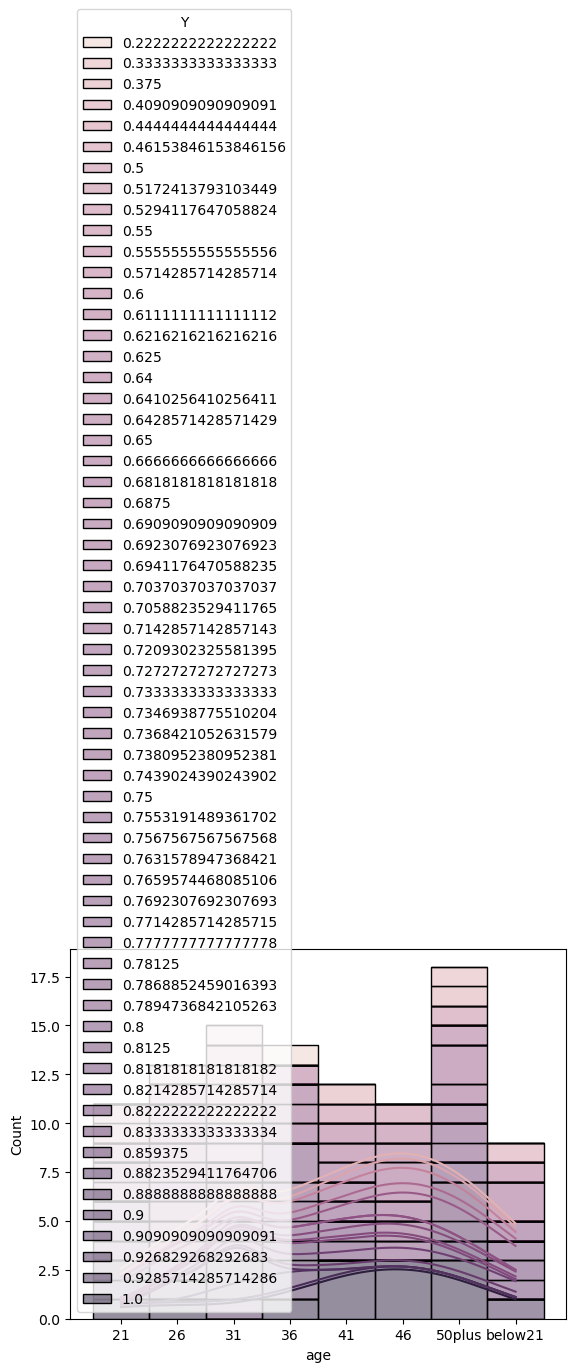

In [187]:
sns.histplot(data=GrpCarOutAgebyFreq, x='age', hue='Y', multiple="stack", stat='count',kde=True)

<Axes: xlabel='CarryAway', ylabel='Count'>

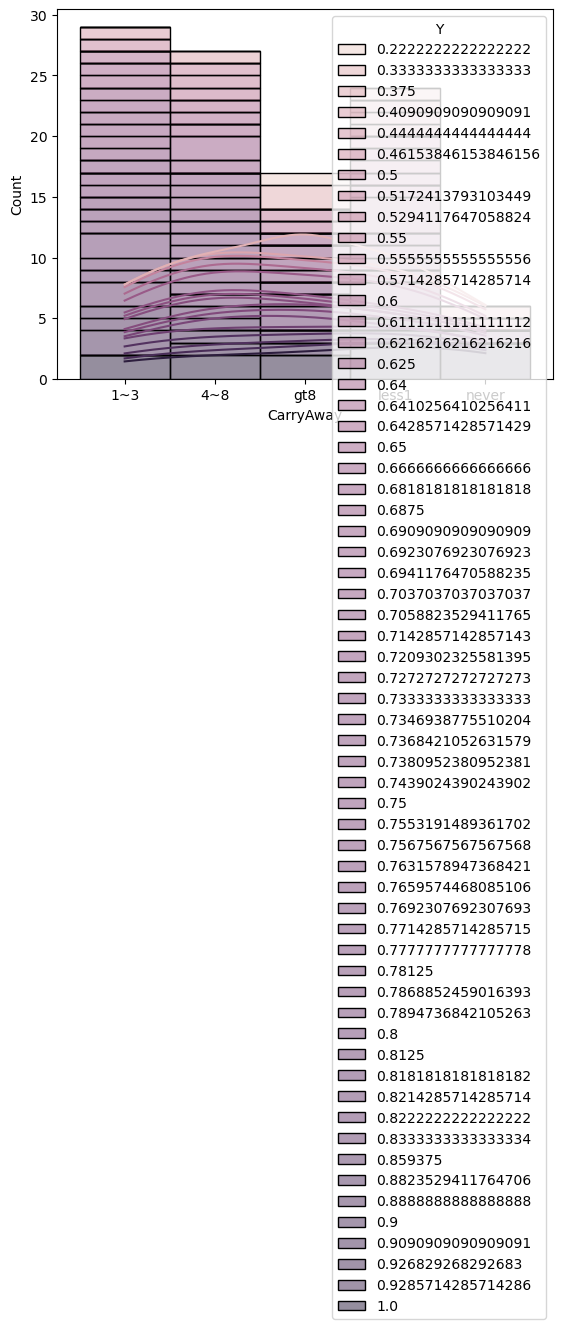

In [188]:
### As you can see people above 40 age have accepted the coupon maximum number of times
sns.histplot(data=GrpCarOutAgebyFreq, x='CarryAway', hue='Y', multiple="stack", stat='count',kde=True)

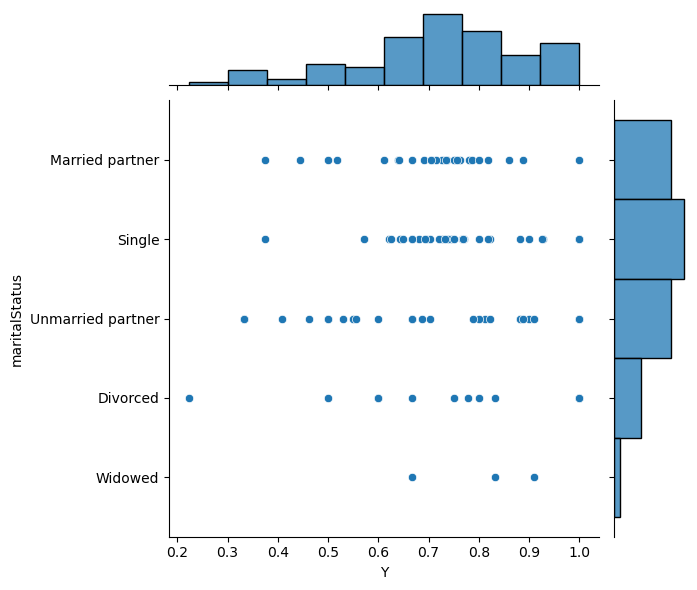

In [193]:
sns.jointplot(x ='Y', y ='maritalStatus', data = GrpCarOutAgebyFreq)

In [195]:
#With the above graph we can hypothize that Single car drivers were heighest acceptance rate followed by unmarrid Partenrs & Married